### Welcome to Week 3

This is a notebook for the Week 3 of the Developer Challenge:
 https://blogs.sap.com/2023/03/08/sap-community-developer-challenge-eda-with-sap-hana-and-python/



### Initialize the notebook

Import required packages

In [1]:
from hana_ml import dataframe as hdf
import pandas as pd


ModuleNotFoundError: No module named 'shapely'


Connecting to SAP HANA database instance with a database user, same as during Week 1 & 2!

In [2]:
myconn = hdf.ConnectionContext(userkey='DevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())


SAP HANA DB version:  4.00.000.00.1679387658 (fa/CE2022.42)


In [3]:
print(myconn.sql("SELECT NOW() FROM DUMMY").collect().CURRENT_TIMESTAMP[0])


2023-03-31 12:26:55.802000


Checking tables from Week 2, that are available for this week's exercises

In [4]:
myconn.get_tables()


,TABLE_NAME
0,BIKES
1,SEASONS
2,MONTHS


In [5]:
# Using table() to create a HANA DataFrame from an existing database table
bikes_hdf = myconn.table('BIKES')


In [6]:
bikes_hdf.select_statement


'SELECT * FROM "BIKES"'

## 1. Understanding the dataset

In [7]:
print(f"DataFrame returns {bikes_hdf.count()} record(s)")


DataFrame returns 731 record(s)


In [8]:
# [Number of rows,columns]
print(bikes_hdf.shape)

# number of rows
print(f"Number of rows: {bikes_hdf.shape[0]}")

# number of columns
print(f"Number of columns: {bikes_hdf.shape[1]}")


[731, 12]
Number of rows: 731
Number of columns: 12


In [9]:
bikes_hdf.columns


['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'days_since_2011']

In [10]:
# Using dtypes() to get sql types of the columns
bikes_hdf.dtypes()


[('season', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('yr', 'INT', 10, 10, 10, 0),
 ('mnth', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('holiday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('weekday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('workingday', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('weathersit', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('temp', 'DOUBLE', 15, 15, 15, 0),
 ('hum', 'DOUBLE', 15, 15, 15, 0),
 ('windspeed', 'DOUBLE', 15, 15, 15, 0),
 ('cnt', 'INT', 10, 10, 10, 0),
 ('days_since_2011', 'INT', 10, 10, 10, 0)]

In [11]:
# return the list of columns, whose sql data type is NVARCHAR
[col[0] for col in bikes_hdf.dtypes() if col[1] == 'NVARCHAR']


['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
bikes_hdf.collect().head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
5,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.604356,51.8261,6.000868,1606,5
6,WINTER,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,MISTY,1.236534,49.8696,11.304642,1510,6
7,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,-0.245000,53.5833,17.875868,959,7
8,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,-1.498349,43.4167,24.250650,822,8
9,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,-0.910849,48.2917,14.958889,1321,9


In [13]:
# more effecient to fetch fix data
bikes_hdf.head(10).collect()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
5,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.604356,51.8261,6.000868,1606,5
6,WINTER,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,MISTY,1.236534,49.8696,11.304642,1510,6
7,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,-0.245000,53.5833,17.875868,959,7
8,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,-1.498349,43.4167,24.250650,822,8
9,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,-0.910849,48.2917,14.958889,1321,9


In [14]:
# Comparing the time taken by above two formats for the same output for obervation
import time

time_collect_first = time.time()
bikes_hdf.collect().head(10)
time_head_first = time.time()
bikes_hdf.head(10).collect()
time_end = time.time()

print(
    f"time taken for execution while using bikes_hdf.collect().head(10) : {time_head_first-time_collect_first}")
print(
    f"time takenfor execution while using bikes_hdf.head(10).collect() : {time_end-time_head_first}")


time taken for execution while using bikes_hdf.collect().head(10) : 0.8778030872344971
time takenfor execution while using bikes_hdf.head(10).collect() : 0.9213738441467285


In [15]:
# sql select statement for top 10 records
bikes_hdf.head(10).select_statement


'SELECT TOP 10 * FROM (SELECT * FROM "BIKES") dt'

In [16]:
# get last x records based on ref_col(according to which a dataset should be sorted)
bikes_hdf.tail(5, ref_col='days_since_2011').collect()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2012,DEC,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
1,WINTER,2012,DEC,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
2,WINTER,2012,DEC,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
3,WINTER,2012,DEC,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729
4,WINTER,2012,DEC,NO HOLIDAY,MON,WORKING DAY,MISTY,2.144151,57.7500,10.374682,2729,730


In [17]:
bikes_hdf.tail(5, ref_col='days_since_2011').select_statement


'SELECT "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt", "days_since_2011" FROM (SELECT  ROW_NUMBER() OVER(ORDER BY "days_since_2011" ASC) IDX59A1FEDC_CFBF_11ED_BE75_ACDE48001122 , * FROM (SELECT * FROM "BIKES")) WHERE IDX59A1FEDC_CFBF_11ED_BE75_ACDE48001122 <= 731 AND IDX59A1FEDC_CFBF_11ED_BE75_ACDE48001122 > 726'

In [18]:
# checking if database contains null values
bikes_hdf.hasna()


False

In [19]:
# chekcing for particular columns, if contains null values
for col in bikes_hdf.columns:
    print(f"NULLs in {col}: {bikes_hdf.hasna(col)}")


NULLs in season: False
NULLs in yr: False
NULLs in mnth: False
NULLs in holiday: False
NULLs in weekday: False
NULLs in workingday: False
NULLs in weathersit: False
NULLs in temp: False
NULLs in hum: False
NULLs in windspeed: False
NULLs in cnt: False
NULLs in days_since_2011: False


In [20]:
# using for generating descriptive statistics in database
bikes_hdf.describe().collect()


,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,yr,731,2,0,2011.500684,0.500341,2011.000000,2012.000000,2012.000000,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
1,temp,731,499,0,15.283085,8.603397,-5.220871,32.498349,15.421651,7.842924,7.823349,15.421651,15.421651,22.804576,22.824151
2,hum,731,595,0,62.789406,14.242910,0.000000,97.250000,62.666700,52.000000,52.000000,62.666700,62.666700,73.020850,73.041700
3,windspeed,731,650,0,12.762576,5.192357,1.500244,34.000021,12.125325,9.041650,9.041650,12.125325,12.125325,15.625371,15.625807
4,cnt,731,696,0,4504.348837,1937.211451,22.000000,8714.000000,4548.000000,3152.000000,3141.000000,4548.000000,4548.000000,5956.000000,5976.000000
5,days_since_2011,731,731,0,365.000000,211.165811,0.000000,730.000000,365.000000,182.500000,182.000000,365.000000,365.000000,547.500000,548.000000
6,season,731,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mnth,731,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,holiday,731,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,weekday,731,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
bikes_hdf.describe().select_statement


'SELECT * FROM (SELECT "SimpleStats".*, "Percentiles"."25_percent_cont", "Percentiles"."25_percent_disc", "Percentiles"."50_percent_cont", "Percentiles"."50_percent_disc", "Percentiles"."75_percent_cont", "Percentiles"."75_percent_disc" FROM (select \'yr\' as "column", COUNT("yr") as "count", COUNT(DISTINCT "yr") as "unique", SUM(CASE WHEN "yr" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("yr")) as "mean", STDDEV("yr") as "std", MIN("yr") as "min", MAX("yr") as "max", MEDIAN("yr") as "median" FROM (SELECT * FROM "BIKES") AS "DT_4" UNION ALL select \'temp\' as "column", COUNT("temp") as "count", COUNT(DISTINCT "temp") as "unique", SUM(CASE WHEN "temp" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("temp")) as "mean", STDDEV("temp") as "std", MIN("temp") as "min", MAX("temp") as "max", MEDIAN("temp") as "median" FROM (SELECT * FROM "BIKES") AS "DT_4" UNION ALL select \'hum\' as "column", COUNT("hum") as "count", COUNT(DISTINCT "hum") as "unique", SUM(CASE WHEN "hum" is NULL

#### Closer look at properties of columns in a dataframe

In [22]:
# Checking statistics only for columns storing strings
bikes_hdf.describe([col[0] for col in bikes_hdf.dtypes(
) if col[1] == 'NVARCHAR']).collect().dropna(axis=1, how='all')


,column,count,unique,nulls
0,season,731,4,0
1,mnth,731,12,0
2,holiday,731,2,0
3,weekday,731,7,0
4,workingday,731,2,0
5,weathersit,731,3,0


In [23]:
(bikes_hdf
 .describe([col[0] for col in bikes_hdf.dtypes() if col[1] == 'NVARCHAR'])
 .collect()
 .dropna(axis=1, how='all')  # uncomment this line to see the difference
 .set_index('column')
 )


,count,unique,nulls
column,,,
season,731,4,0
mnth,731,12,0
holiday,731,2,0
weekday,731,7,0
workingday,731,2,0
weathersit,731,3,0


In [24]:
# checking unique values in season column using a distinct() method.
bikes_hdf.distinct(cols='season').collect()


,season
0,SUMMER
1,FALL
2,SPRING
3,WINTER


In [25]:
# list unique values for all columns
for column in [col[0] for col in bikes_hdf.dtypes() if col[1] == 'NVARCHAR']:
    print(
        f"{column}: {bikes_hdf.distinct(column).collect().iloc[:,0].tolist()}")


season: ['SUMMER', 'FALL', 'SPRING', 'WINTER']
mnth: ['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT', 'SEP']
holiday: ['HOLIDAY', 'NO HOLIDAY']
weekday: ['FRI', 'TUE', 'SUN', 'THU', 'WED', 'MON', 'SAT']
workingday: ['NO WORKING DAY', 'WORKING DAY']
weathersit: ['MISTY', 'GOOD', 'RAIN/SNOW/STORM']


In [26]:
# Checking how often each weather situation occurs in the dataframe using a value_counts() method.
bikes_hdf.value_counts(['weathersit']).collect()


,VALUES,NUM_weathersit
0,MISTY,247
1,GOOD,463
2,RAIN/SNOW/STORM,21


In [27]:
bikes_hdf.describe('yr').collect()


,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,yr,731,2,0,2011.500684,0.500341,2011,2012,2012,2011.0,2011,2012.0,2012,2012.0,2012


In [28]:
# checking the basic characteristics of numeric values in columns
(bikes_hdf
 .describe([col[0] for col in bikes_hdf.dtypes() if col[1] != 'NVARCHAR'])
 .collect()
 .iloc[:, :9]
 .set_index('column')
 )


,count,unique,nulls,mean,std,min,max,median
column,,,,,,,,
yr,731,2,0,2011.500684,0.500341,2011.000000,2012.000000,2012.000000
temp,731,499,0,15.283085,8.603397,-5.220871,32.498349,15.421651
hum,731,595,0,62.789406,14.242910,0.000000,97.250000,62.666700
windspeed,731,650,0,12.762576,5.192357,1.500244,34.000021,12.125325
cnt,731,696,0,4504.348837,1937.211451,22.000000,8714.000000,4548.000000
days_since_2011,731,731,0,365.000000,211.165811,0.000000,730.000000,365.000000


In [29]:
# 1. Year column yr contains only 2 different values. Min is 2011 and max is 2012, so the dataframe contains data for two years: 2011 and 2012
print(
    f"Year Column contains : {bikes_hdf.value_counts(['yr']).collect().iloc[:,0].tolist()}")

# 2. A column days_since_2011 contains 731 unique values in 731 records, so each record represents data for one day.
print(
    f"Number of unique days: {len(bikes_hdf.distinct('days_since_2011').collect())}")

# 3. Min value for that column is 0 and the max is 730, so we have values for 731 consequtive days, starting from 2011-01-01.
# 4. A column cnt stores a number of bike rentals per day.
# 5. A temperature temp range between -5.2 and 32.5 should be in degrees Celcius.
# 6. A hum is a humidity percentage, although min value of 0% must be a mistake in data.|


Year Column contains : ['2011', '2012']
Number of unique days: 731


In [30]:
bikes_hdf.value_counts(['yr']).collect()


,VALUES,NUM_yr
0,2011,365
1,2012,366


In [31]:
# bikes_hdf.select('hum').sort('hum').collect()


In [32]:
# For continues, and not discrete, values (like hum) using binning in the process of data exploration.
(bikes_hdf
 .select('hum').sort('hum')
 .bin(col='hum', strategy='uniform_number', bins=10)
 .collect()
 )


,hum,BIN_NUMBER
0,0.0000,1
1,18.7917,2
2,25.4167,3
3,27.5833,3
4,29.0000,3
...,...,...
726,94.8261,10
727,94.9583,10
728,96.2500,10
729,97.0417,10


In [33]:
(bikes_hdf
 .select('hum').sort('hum')
 .bin('hum', strategy='uniform_number', bins=10)
 .value_counts(subset=['BIN_NUMBER'])
 .collect().set_index('VALUES')
 )

# Indeed 0.0000 humidity percentage should be an outlier, for example wrong data recorded...
# and it is the only value in the 1st bin. Most of the values are in bins 6, 7 and 8 (so between 50% and 80% humidity


,NUM_BIN_NUMBER
VALUES,
1,1
2,1
3,3
4,18
5,95
6,173
7,164
8,169
9,73


<Axes: xlabel='VALUES'>

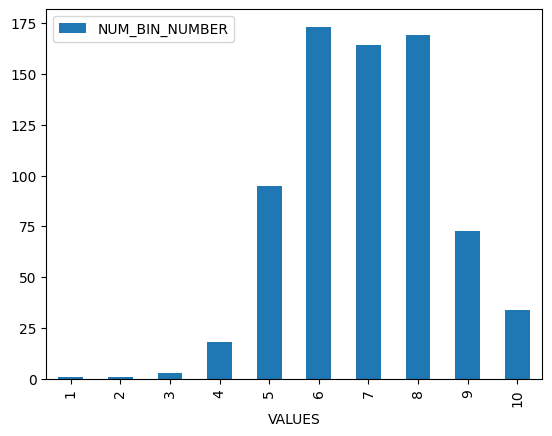

In [34]:
# plotting for clear visual analysis
data = (bikes_hdf
        .select('hum').sort('hum')
        .bin('hum', strategy='uniform_number', bins=10)
        .value_counts(subset=['BIN_NUMBER'])
        .collect().set_index('VALUES')
        )

data.plot(kind='bar')


#### Filtering
(selecting rows)

In [35]:
# Using a filter() method to return only rows that match the given condition.
bikes_hdf.filter(condition='"yr"=2011').count()


365

In [36]:
bikes_hdf.filter(condition='"yr"=2011 AND "holiday"=\'HOLIDAY\'').collect()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,HOLIDAY,MON,NO WORKING DAY,MISTY,0.264151,53.7500,12.999139,1000,16
1,WINTER,2011,FEB,HOLIDAY,MON,NO WORKING DAY,MISTY,6.256651,60.5000,20.625682,1107,51
2,SPRING,2011,APR,HOLIDAY,FRI,NO WORKING DAY,GOOD,12.993349,67.1250,15.167125,3126,104
3,SPRING,2011,MAY,HOLIDAY,MON,NO WORKING DAY,GOOD,26.466651,68.5000,8.792075,4098,149
4,SUMMER,2011,JUL,HOLIDAY,MON,NO WORKING DAY,MISTY,26.153349,63.7917,5.459106,6043,184
5,SUMMER,2011,SEP,HOLIDAY,MON,NO WORKING DAY,MISTY,23.646651,79.0417,14.250632,3351,247
6,FALL,2011,OCT,HOLIDAY,MON,NO WORKING DAY,GOOD,18.829151,73.3750,2.834381,5117,282
7,FALL,2011,NOV,HOLIDAY,FRI,NO WORKING DAY,GOOD,7.235849,44.6250,21.083225,3368,314
8,FALL,2011,NOV,HOLIDAY,THU,NO WORKING DAY,GOOD,9.546651,54.9167,11.209368,1495,327
9,WINTER,2011,DEC,HOLIDAY,MON,NO WORKING DAY,GOOD,7.121733,50.6957,16.044155,1317,359


#### Projection
(selecting columns)

In [37]:
# Using a select() method to return only columns we want to have in the result HANA DataFrame.
(bikes_hdf
 .filter(condition='"yr"=2011 AND "holiday"=\'HOLIDAY\' ')
 .select('weekday', 'days_since_2011')
 .collect()
 )


,weekday,days_since_2011
0,MON,16
1,MON,51
2,FRI,104
3,MON,149
4,MON,184
5,MON,247
6,MON,282
7,FRI,314
8,THU,327
9,MON,359


In [38]:
# A select() method can be used to derive new columns from existing when provided as a tuple (<SQL expression>, <alias>).
# In the example below a new column calday is calculated using the SAP HANA SQL ADD_DAYS function to add number from the "days_since_2011" column to the date 2011-01-01.
(bikes_hdf
 .filter('"yr"=2011 AND "holiday"=\'HOLIDAY\'')
 .select('weekday', ('ADD_DAYS(\'2011-01-01\',"days_since_2011")', 'calday'))
 .collect()
 )


,weekday,calday
0,MON,2011-01-17
1,MON,2011-02-21
2,FRI,2011-04-15
3,MON,2011-05-30
4,MON,2011-07-04
5,MON,2011-09-05
6,MON,2011-10-10
7,FRI,2011-11-11
8,THU,2011-11-24
9,MON,2011-12-26


In [39]:
# creating a new HANA DataFrame bikebydays_hdf that has all columns ('*') from the original dataframe bikes_hdf plus a derived column calday
bikebydays_hdf = bikes_hdf.select(
    '*', ('add_days(\'2011-01-01\',"days_since_2011")', 'calday'))


In [40]:
bikebydays_hdf.select_statement


'SELECT "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt", "days_since_2011", add_days(\'2011-01-01\',"days_since_2011") AS "calday" FROM (SELECT * FROM "BIKES") AS "DT_4"'

In [41]:
bikebydays_hdf.collect()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011,calday
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0,2011-01-01
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1,2011-01-02
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2,2011-01-03
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3,2011-01-04
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,WINTER,2012,DEC,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726,2012-12-27
727,WINTER,2012,DEC,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727,2012-12-28
728,WINTER,2012,DEC,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728,2012-12-29
729,WINTER,2012,DEC,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729,2012-12-30


In [42]:
# query holidays in 2012.
(bikebydays_hdf
 .filter(condition='"yr"=2012 AND "holiday"=\'HOLIDAY\'')
 .select('weekday', 'calday')
 .collect()
 )


,weekday,calday
0,MON,2012-01-02
1,MON,2012-01-16
2,MON,2012-02-20
3,MON,2012-04-16
4,MON,2012-05-28
5,WED,2012-07-04
6,MON,2012-09-03
7,MON,2012-10-08
8,MON,2012-11-12
9,THU,2012-11-22


In [43]:
# Find days with the smallest numbers of bike rentals
bikebydays_hdf.deselect('days_since_2011').sort(
    cols='cnt', desc=False).head(5).collect()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,calday
0,FALL,2012,OCT,NO HOLIDAY,MON,WORKING DAY,RAIN/SNOW/STORM,12.680000,88.0000,23.999400,22,2012-10-29
1,WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.165000,68.7500,7.627079,431,2011-01-27
2,WINTER,2012,DEC,NO HOLIDAY,WED,WORKING DAY,RAIN/SNOW/STORM,3.436651,82.3333,21.208582,441,2012-12-26
3,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,RAIN/SNOW/STORM,2.222500,86.2500,19.687950,506,2011-01-26
4,WINTER,2011,MAR,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.696534,94.8261,23.000229,605,2011-03-06


In [44]:
# What is the smallest count of bikes rented during one day?
smallest_number_bike_rentals = bikebydays_hdf.deselect(
    'days_since_2011').sort(cols='cnt', desc=False).head(5).collect()
print(
    f"Smallest count of bikes rented during one day : {smallest_number_bike_rentals.cnt[0]}")


Smallest count of bikes rented during one day : 22


#### Joining
(combining datasets)

In [45]:
# Let's check summer months of 2012.
bikes_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''').distinct('mnth').collect()


,mnth
0,AUG
1,JUL
2,JUN
3,SEP


In [46]:
(bikebydays_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''')
 .agg(
     [('min', 'calday', 'MIN'),
      ('max', 'calday', 'MAX')],
     group_by=['mnth']
)
    .collect()
)


,mnth,MIN,MAX
0,AUG,2012-08-01,2012-08-31
1,JUL,2012-07-01,2012-07-31
2,JUN,2012-06-21,2012-06-30
3,SEP,2012-09-01,2012-09-22


In [47]:

myconn.table('MONTHS').collect()


,ID,DESC
0,1,JAN
1,2,FEB
2,3,MAR
3,4,APR
4,5,MAY
5,6,JUN
6,7,JUL
7,8,AUG
8,9,SEP
9,10,OCT


In [48]:

# joining last two HANA DataFrames to order month by their ID from MONTHS table.
(bikebydays_hdf.filter('''
"season"='SUMMER' AND "yr"=2012
''')
 .agg(
     [('min', 'calday', 'MIN'),
      ('max', 'calday', 'MAX')],
     group_by=['mnth']
)
    .join(other=myconn.table('MONTHS'), condition='"mnth"="DESC"',
          select=['ID', ('DESC', 'MONTH'), 'MIN', 'MAX'])
    .sort('ID')
    .collect()
    .set_index('ID'))


,MONTH,MIN,MAX
ID,,,
6,JUN,2012-06-21,2012-06-30
7,JUL,2012-07-01,2012-07-31
8,AUG,2012-08-01,2012-08-31
9,SEP,2012-09-01,2012-09-22
